# **Lab experience #7 (STUDENTS): Design and apply DBSCAN clustering**

This seventh lab session aims **to design and apply the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm** to an unknown matrix of data (with low dimensionality and continuous attributes). This lab session refers to Prof. Stella's lectures no.7 and 8 "Cluster Analysis: DBSCAN", and "Cluster Analysis: Clustering validation".

In this lab, you are going to **(re-)use already developed code**: check solutions of previous labs. Today, you are going to add code to properly select the main parameters of DBSCAN (epsilon, i.e., the radius, and MinPts, i.e., the minimum number of points required to define a "dense" core region), and to test this particular algorithm. For this lab, you are going to familiarize with a new sklearn function: [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).


**Read the step-by-step instructions below** carefully and write your own code to fill the missing steps.

**For this lab session, no report is required.**

## Initial notes:
In order to re-use the most of this code for the next lab session, we are going to use the following notation:

> ```
> Kd            = number of clusters for the DBSCAN clustering solution
> dbscan_labels = the labels assigend by the DBSCAN clustering solution
> ```

And here is the NEW PALETTE to use for this lab session:

In [9]:
# Palette to plot a certain number of clusters (BLACK is kept for outliers, so here is NOT included)
PAL = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'magenta', 'cyan', 'brown']

# **Step 1**: Load and visualize the input data, and import useful packages

In this cell, you load **the input data, a 2D matrix synthetically created**. The matrix has M columns (for the attributes or features) and N rows that we assume to represent the collection of objects (also called observations or items).

---
> For the first part, the true number of clusters (Kd) as well as the true labels are _not_ given.
---

---
> In the second part, you will be given with the true labels to complete the lab with supervised validation.
---

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Load the dataset
# ----------------
X = np.load("Dataset_lab07.npy")
[N,M] = np.shape(X)    # N=no. of objects, M=no. of attributes

print("The matrix has shape = ", np.shape(X))
print('It has %d objects and %d attributes.' % (N, M) )


# Backup copy of the original dataset
raw_data = X

The matrix has shape =  (135, 14)
It has 135 objects and 14 attributes.


# **Step 2**: Normalize the dataset

If you know (or realize) that the attributes describing the dataset assume very different ranges of values, you should normalize them (every single one) using one of the following methods.

In [11]:
# Scaling
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler

# StandardScaler: z = (x - u) / s
#
# RobustScaler: it removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
#               The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
# Normalizer:   Each sample (i.e. each row of the data matrix) with at least one non-zero component is rescaled
#               independently of other samples so that its norm (l1, l2 or inf) equals one.
# MinMaxScaler: Transform features by scaling each feature to a given range.
#               X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#               X_scaled = X_std * (max - min) + min
#               scaler = MinMaxScaler(feature_range=(-1, 1))


# Initialize the scaler you want to use
scaler = StandardScaler()

# Apply the scaling to data
X = scaler.fit_transform(raw_data)

# **Step 3**: Visual inspection of the dataset
We have already explored and exploited several ways to visually inspect a new dataset in the previous labs. You can choose one or more among the following methods and implement them to guess some preliminary information from the dataset, before going into the clustering:
1. Plot the dataset in a 2D image with the colorbar, axes labels, and proper axes ticks
2. Compute the proximity matrix
3. Plot the proximity matrix as an image (check the new utility function called ```proximity_matrix```)
4. Scatterplot using two attributes. For this, check the new utility function called ```scatter_clustering_solution```
5. Apply PCA/tSNE and visualize the data points in 2D to guess if clusters exist. Note: as you don't have labels at this point, use the usual "trick" of previous labs to assign all data points the same numerical label.

PCA: explained variation per principal component: [0.63 0.12]

Applying tSNE...


<Figure size 1500x500 with 0 Axes>

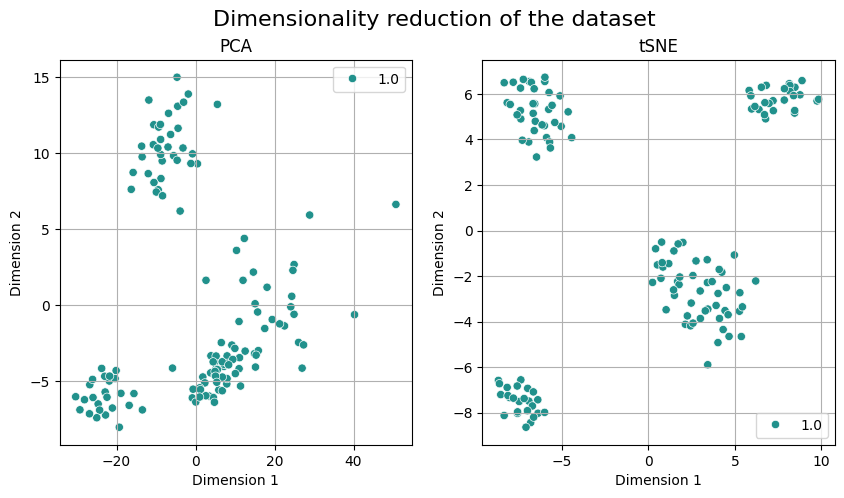

In [12]:
# Visualization(s) of the dataset
fig1 = plt.figure(figsize=(15,5))
#
#
#
#
PCA_tSNE_visualization(raw_data, 2, np.ones(np.shape(raw_data)[0]), 'viridis')

# **Step 4**: NAIVE design and application of DBSCAN clustering algorithm

1. Choose the parameters:
* choose a numerical value for **eps** (= epsilon)
* choose another numerical value for **min_samples** (= MinPts)
* use the default distance metric, i.e., Euclidean


In [13]:
# Import useful packages for clustering
from sklearn.cluster import DBSCAN

In [14]:
# Choose the value of the main parameters to run DBSCAN clustering
EPS             = 2
MINSAMPLES      = 4
distance_metric = 'euclidean'


2. Apply the algorithm in a naive way. You can use the following lines of code:

> ```
>  db = DBSCAN(eps=EPS, min_samples=MINSAMPLES, metric=distance_metric)
>  db.fit(X)
> ```


Attributes (outputs of this function):
* ```core_sample_indices_``` is an ndarray of shape (n_core_samples,) including the indices of core samples
* ```components_``` is an ndarray of shape (n_core_samples, n_features) representing a copy of each core sample found by training.
* ```labels_``` is an ndarray of shape (n_samples) with the cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

In [15]:
# Apply the algorithm in a naive way
db = DBSCAN(eps=EPS, min_samples=MINSAMPLES, metric=distance_metric).fit(X)

# Retrieve the labels
labels = db.labels_

# Checkpoint
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1 -1  2  2 -1  2  2  2 -1  2  2  2  2  2  2 -1
  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1]


3. Visualize and evaluate the results. Particularly, retrive the number of clusters formed by DBSCAN (Kd), the number of core/border/noise points. For the visualization, again, you have multiple possibilities.

```
Did you expect that classification?
Did you expect those particular samples to be outliers?
```

In [16]:
# Find out the number of core/border/noise points. Hint: remember that noise points have their own "label". However, that should not be counted in the number of clusters.
#
Kd = len(set(labels)) - (1 if -1 in labels else 0) # the number of clusters
corep =  len(db.core_sample_indices_) # the number of core points
noisep = np.sum(db.labels_ == -1) # the number of noise points
boardp = np.sum(db.labels_ != -1) - corep # the number of border points

print("Estimated number of clusters: %d" % Kd)
print("In total, there should be %d core points and %d border points." % (corep,boardp))
print("Estimated number of noise points: %d." % noisep)

Estimated number of clusters: 4
In total, there should be 111 core points and 12 border points.
Estimated number of noise points: 12.


PCA: explained variation per principal component: [0.6  0.12]

Applying tSNE...


/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_78293/1091745415.py:40: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_78293/1091745415.py:47: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


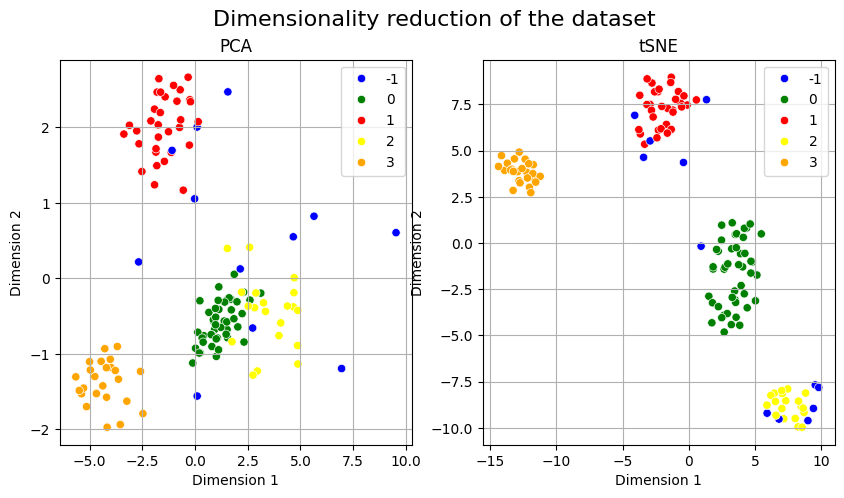

In [17]:
# Visualization of the clustering solution. Use BLACK COLOR and CROSS MARKER for noise (outliers) data points.
#
#
#
#
#

PCA_tSNE_visualization(X, 2, labels, PAL)

# **Step 5**: Design and apply the DBSCAN clustering (using the "knee point")

1. Apply the "knee method" to find the "knee point":

```
a) set k, as the k-th nearest neighbour to compute the max distance from a core point
b) compute the distance of every point from its own k-th nearest neighbour. Hint: use the knn package.
c) sort objects by ascending value of the previous distances
d) plot distance vs objects (sorted)
e) identify the "knee point"
f) set rstar (r*), i.e., the optimal candidate radius value for the parameter eps.
```

Hints:
- for a) and b), use the knn package (see documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

- To find the K-neighbors of a point and return distance, use method ```kneighbors``` with the following syntax:
```kneighbors(X, n_neighbors=None, return_distance=True)```. Read documentation [here](https://scikit-learn.org/0.15/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.fit).

- in choosing the value of k, remind that the 1st nearest neighbour is the point itself.

- to find the knee point, you can use the ```kneed``` package. If you got an error while importing it, use the following command to install it here: ```!pip install kneed```

_Reference for this package: Satopaa, V., Albrecht, J., Irwin, D., & Raghavan, B., “Finding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior”, 31st IEEE international conference on distributed computing systems workshops, pp. 166-171, 2011._


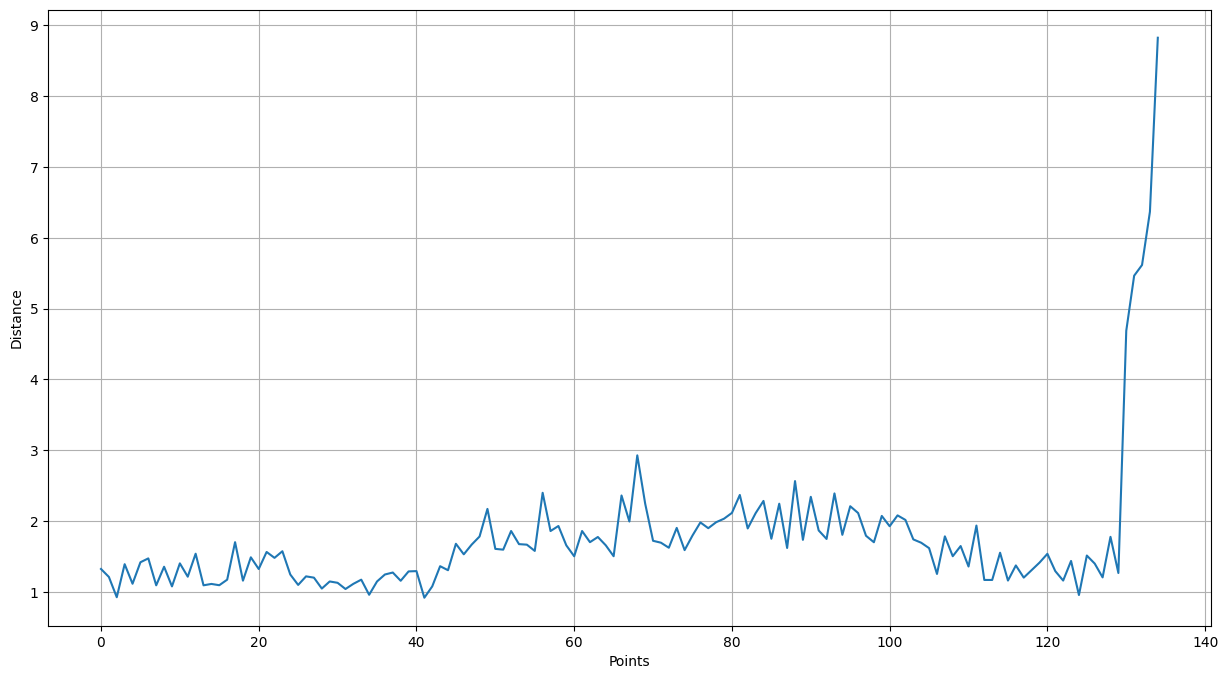

In [18]:
# Apply KNEE METHOD to decide the optimal candidate for the eps parameter
from sklearn.neighbors import NearestNeighbors as knn

neighborhood_order = 4                                                    # this number should be coherent with the MINSAMPLES parameter
neighborhood_set   = knn(n_neighbors=neighborhood_order).fit(X)             # Note that in the nearest neighbour calculation, the point itself will appear as the first nearest neighbour
#
#
#
#

distances = neighborhood_set.kneighbors(X)[0][:,neighborhood_order-1]     # the distance to the k-th nearest neighbour
fig5 = plt.figure(figsize=(15,8))
# plot here the distances
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

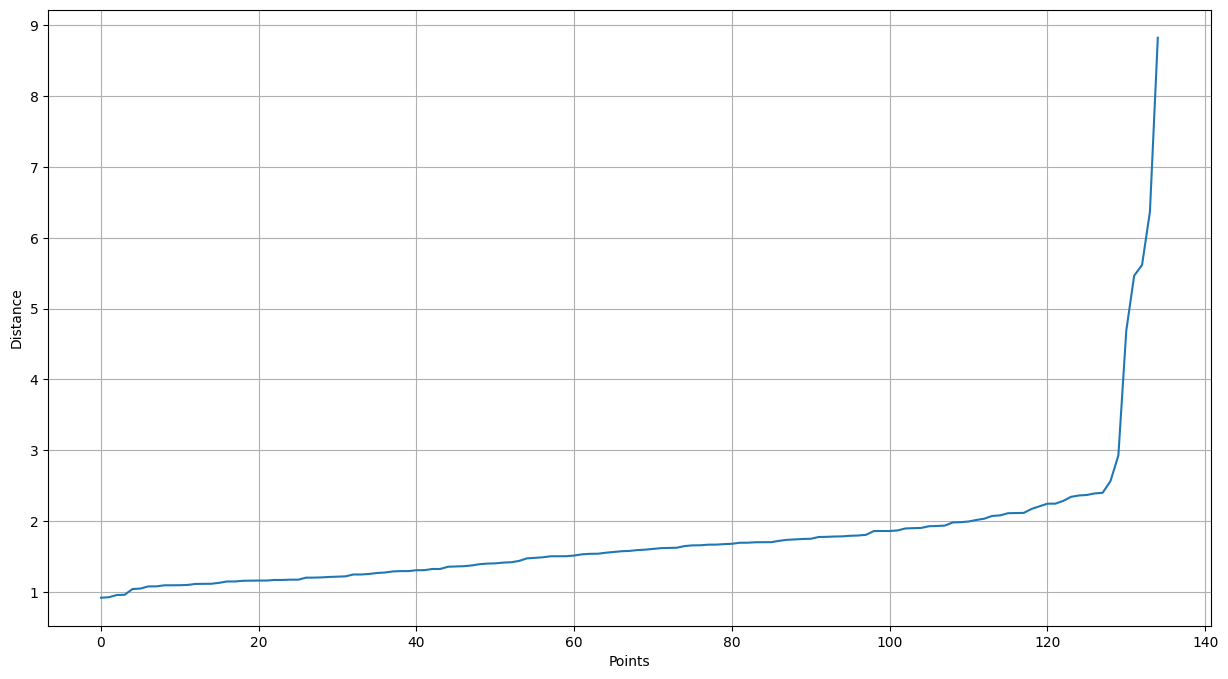

In [19]:
# Apply KNEE METHOD to decide the optimal candidate for the eps parameter
from sklearn.neighbors import NearestNeighbors as knn

neighborhood_order = 4                                                    # this number should be coherent with the MINSAMPLES parameter
neighborhood_set   = knn(n_neighbors=neighborhood_order).fit(X)             # Note that in the nearest neighbour calculation, the point itself will appear as the first nearest neighbour
#
#
#
#

sorted_d = np.sort(distances)
fig5 = plt.figure(figsize=(15,8))
# plot here the distances
plt.plot(sorted_d)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

The estimated best eps value is = 2.25


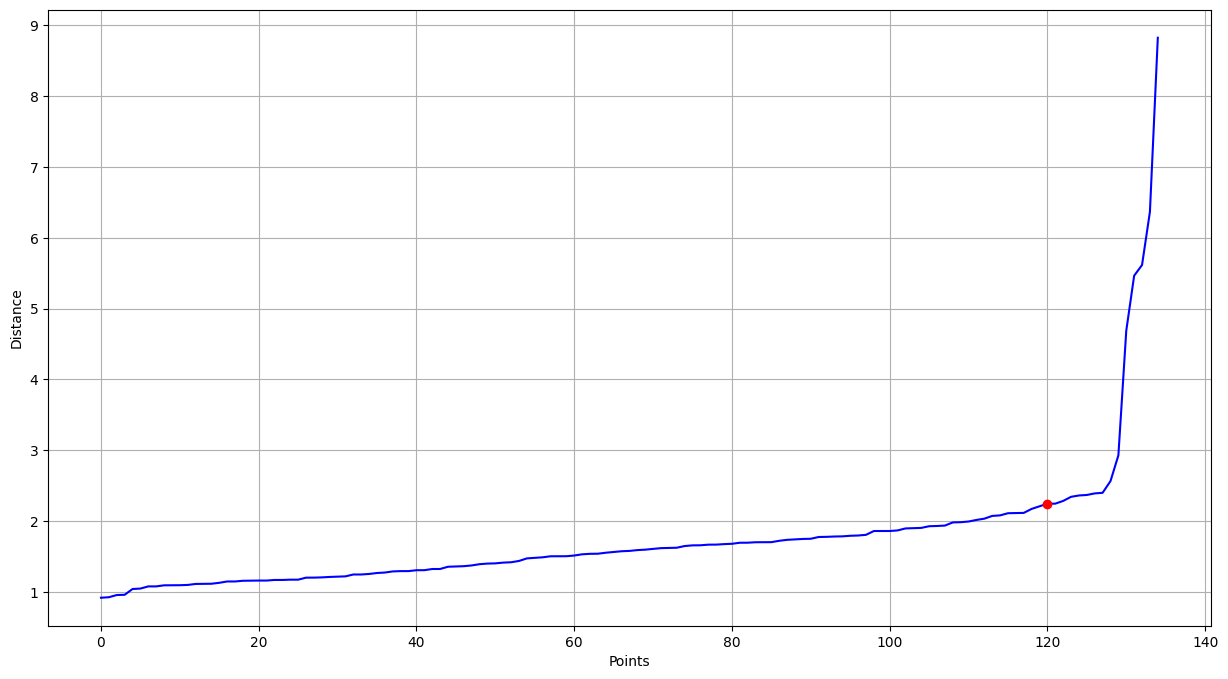

In [20]:
# To find the "knee"

# !pip install kneed     # <-- UNCOMMENT THIS LINE, if needed

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, sorted_d, S=1, curve='convex', direction='increasing', interp_method='polynomial')

knee_x = knee.knee
knee_y = knee.knee_y
# Hint: you may find useful to obtain a list of all methods of the "knee" object. To this purpose, you can use: dir(knee)

print('The estimated best eps value is = %.2f' % knee_y)

plt.figure(figsize=(15,8))
# Plot the knee:
plt.plot(i, sorted_d, 'b', label='Distances')
plt.plot(knee_x, knee_y, 'ro', label='Knee')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()


In [21]:
# Add a vertical and a horizontal line to indicate the "knee" in the plot before
plt.figure(fig4)
# add here the vertical line
# add here the horizontal line
plt.plot((knee_x), (knee_y), 'o', color='r')    # do not change this line
plt.show()

NameError: name 'fig4' is not defined

2. Knee method: now, properly choose the epsilon value (name it EPS_KNEE).

In [22]:
# Set the optimal eps.
EPS_KNEE = knee_y

3. Apply DBSCAN again.


In [23]:
# Apply the clustering
dbscan = DBSCAN(eps=EPS_KNEE, min_samples=MINSAMPLES, metric=distance_metric).fit(X)

# Retrieve the labels
dbscan_labels = dbscan.labels_

# Checkpoint
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3 -1 -1 -1 -1 -1]


# **Step 6**: Validate the DBSCAN clustering solution



1. Visualize the solution and compare it with the previous one.

In [24]:
# Find out the number of core/border/noise points. Hint: remember that noise points have their own "label". However, that should not be counted in the number of clusters.
#
Kd = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) # the number of clusters
corep =  len(dbscan.core_sample_indices_) # the number of core points
noisep = np.sum(dbscan.labels_ == -1) # the number of noise points
boardp = np.sum(dbscan.labels_ != -1) - corep # the number of border points

print("Estimated number of clusters: %d" % Kd)
print("In total, there should be %d core points and %d border points." % (corep,boardp))
print("Estimated number of noise points: %d." % noisep)

Estimated number of clusters: 4
In total, there should be 121 core points and 7 border points.
Estimated number of noise points: 7.


PCA: explained variation per principal component: [0.6  0.12]

Applying tSNE...


/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_78293/1091745415.py:40: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
/var/folders/3t/9pfjmtv5277d5j2y93gvpb6m0000gn/T/ipykernel_78293/1091745415.py:47: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


<Figure size 1000x500 with 0 Axes>

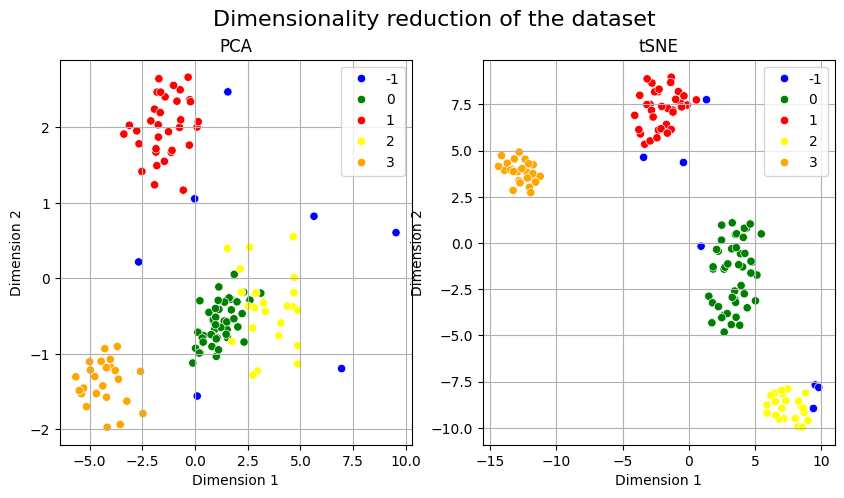

In [25]:
# Visualize the clustering solution (using the color palette and markers as above)
fig6a = plt.figure(figsize=(10,5))
#
#
#
#
PCA_tSNE_visualization(X, 2, dbscan_labels, PAL)

2. Use one or more measures/strategies to validate a clustering solution, and apply it/them to evaluate the performance of the DBSCAN output (e.g., inter-cluster distanced, silhouette score, correlation between similarity matrix with the proximity matrix).

In [31]:
# Import packages you might need
import sklearn.metrics as metrics

# Compute measures
#
centers = find_cluster_centers(X, dbscan_labels, Kd)
silhouette = metrics.silhouette_score(X, dbscan_labels)

# Print measures or plot figures
print('Silhouette Coefficient = %.3f' % silhouette)

fig6b = plt.figure(figsize=(10,5))
#
#
feat1, feat2 = 0, 1
scatter_clustering_solution(X, feat1, feat2, dbscan_labels, PAL, fig6b)
for k in range(Kd):
    plt.plot(centers[k][feat1], centers[k][feat2], 'o', color='black', markersize=10)
plt.xlabel('Feature %d' % feat1)
plt.ylabel('Feature %d' % feat2)
plt.grid()
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

--------------------------------------------------------------

**SUPERVISED VALIDATION**
This additional section is intended to appreciate some more aspects of the application of DBSCAN to this particular dataset. Here, I also give you the "expert labels" (i.e., the groundtruth), in order to apply also some supervised measures for the validation.

The "expert labels" are listed in the file "TRUElabels_lab07.npy".

In [ ]:
# Load the true labels
TRUElabels_lab07 = np.load("TRUElabels_lab07.npy")

Compare labels assignment between groundtruth and DBSCAN algorithm. We have already seen different ways to implement this step in previous labs (e.g., plot labels from the clustering solution and the true labels as lines in the same plot, adjusted Rand index).

In [ ]:
# Computations/visualizations
#
#
#
#

--------------------------------------------------------------

# _This it the end of Lab session #7_ ✅


# Utility functions

In [ ]:
# NEW METHOD
def scatter_clustering_solution(X, feat1, feat2, labels, PAL, fighandle):
    plt.figure(fighandle)

    for l in range(0, np.size(labels)):
      if labels[l] == -1:
          # Plot noise points in black with cross marker
          plt.scatter(X[l, feat1], X[l, feat2], c='k', marker='x', s=50) #, label='Noise')
      else:
          # Plot points in current cluster color
          plt.scatter(X[l, feat1], X[l, feat2], c=PAL[labels[l]], s=50)

    plt.xlabel('Attribute no.%d' % feat1)
    plt.ylabel('Attribute no.%d' % feat2)
    plt.grid('on')
    plt.show()

In [ ]:
# [FROM SOLUTION OF PREVIOUS LABS] THIS IS A **METHOD** TO COMPUTE THE PROXIITY MATRIX

def proximity_matrix(data, distance_metric):

  '''
  INPUT
  data             - dataset for which to compute the proximity matrix
  distance_metric  - distance metric to use in the computation. You can choose one among the following: 'euclidean', 'minkowski', 'mahalanobis',  'hamming'/'matching', 'jaccard', 'cosine', 'correlation'.
  '''

  '''
  OUTPUT
  PM: the square proximity matrix
  '''

  # Proximity matrix: to have an idea of how "similar" are the objects in the dataset
  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf

  PM = pdist(X, metric=distance_metric)
  PM = sf(PM).round(2)

  return PM

In [ ]:
# [FROM SOLUTION OF LAB#4] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find visualize data in 2D with clusters in different colours

def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):

  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''

  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''


  # PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  from sklearn.manifold import TSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)


  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)


  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.grid()
  plt.show()

In [ ]:
# [FROM SOLUTION OF LAB#3] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO compute the intra- and inter-cluster distances

def intra_inter_cluster_distances(data, K, labels, cluster_centers, distance_metric):

  '''
  INPUT
  data            - data matrix for which to compute the proximity matrix
  K               - the expected number of clusters
  labels          - predicted labels from the clustering solution applied to data
  cluster_centers - cluster centres from the clustering solution applied to data
  distance_metric - metric to compute the distances within and between clusters. Here, you use the same metric for both measurements (but it might be possible to use two different metrics)
  '''

  '''
  OUTPUT
  d               - intra-cluster distance
  D               - inter-cluster distances
  '''

  from scipy.spatial.distance import pdist as pdist
  from scipy.spatial.distance import squareform as sf


  # Intra-cluster distances (average over all pairwise distances) ----------------- NOTE: bug fixed here!
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll pair-wise inter-cluster distances:\n", D)

  return d, D

In [30]:
# [FROM SOLUTION OF LAB#2] THIS IS A **METHOD** THAT YOU CAN USE TO find cluster centers

def find_cluster_centers(data, K, labels):

  '''
  INPUT
  data    - data matrix for which to compute the proximity matrix
  K       - the expected number of clusters
  labels  - predicted labels from the clustering solution applied to data
  '''

  '''
  OUTPUT
  cluster_centers   - cluster centres from the clustering solution applied to data
  '''

  # Initialize the output
  cluster_centers = np.zeros((K, np.shape(data)[1]))   # np.shape(data)[1] = no. of attributes

  print("%d centroids are being computed, as we have %d clusters." % (K, K) )

  for k in range(0, K):
    ind = np.array( np.where( labels == k ) )
    cluster_points = data[ind, :][0]
    cluster_centers[k,:] = np.mean(cluster_points, axis=0) # cluster_points.mean(axis=0)
    print("The centroid of cluster %d has coordinates: " % (k), *cluster_centers[k,:].round(2))

  return cluster_centers